In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from langdetect import detect

In [158]:
df = pd.read_csv('merged.csv' , sep='\t', encoding='utf-8', index_col=0)
df

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type
0,unsexed green tree python + 60cm vivtek,1000.0,Python Snake,3 years,Mixed,~3years old gtp biak x sorong Typical gtp a...,Patryk M.,Aberdeen,Individual,sale,reptiles
1,Leopard gecko (f),80.0,Gecko,1 year,Female,Selling this leopard gecko I've had the joy of...,Dana I.,Aberdeen,Individual,sale,reptiles
2,rexy,100.0,Iguana,4 years,Male,rexy needs a new home ASP sadly I don't not ...,Gillian W.,Aberdeen,Individual,sale,reptiles
3,Panther Chameleon and full set up,550.0,Chameleon,9 months,Male,Blue is a 6 month old Nosey Mitsio chameleon. ...,Craig H.,Aberdeen,Individual,sale,reptiles
4,Hand reared white Indian ringnecks,300.0,Parakeets,9 weeks,Mixed,I have 2 stunning white Indian ringnecks. 1 ma...,Dave T.,Aberdeen,Individual,sale,birds
...,...,...,...,...,...,...,...,...,...,...,...
48776,canarys for sale all colour plus new colours,40.0,Canaries,7 weeks,Mixed,there are all mixed cocks and hens new volour ...,Robert n.,Knottingley,Breeder,sale,birds
48777,TAME & TALKING HARNESS TRAINED BLUE & GOLD MACAW,2150.0,Macaws,4 years,Male,Rainbow is a beautiful example of a blue and g...,The Bradford Birdman,Bradford,Licensed Breeder,sale,birds
48778,Hand reared indian ringnecks babys,350.0,Parrots,1 year,Male,Hand reared cuddly silly tame little babys for...,Waqar A.,Bradford,Breeder,sale,birds
48779,One yellow one orange canary.,60.0,Canaries,2 years,Mixed,I’m reluctantly listing my canaries (peach and...,Amylia R.,Barnsley,Individual,sale,birds


# EDA and Data Cleaning

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48781 entries, 0 to 48780
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            48781 non-null  object 
 1   price            48781 non-null  float64
 2   species          48781 non-null  object 
 3   age              48781 non-null  object 
 4   gender           48781 non-null  object 
 5   description      48781 non-null  object 
 6   seller_name      48781 non-null  object 
 7   seller_location  48781 non-null  object 
 8   seller_type      48781 non-null  object 
 9   listing_type     48781 non-null  object 
 10  pet_type         48781 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.5+ MB


In [160]:
df.nunique()

Title              37519
price                394
species              438
age                  101
gender               139
description        44796
seller_name        20520
seller_location     1083
seller_type            5
listing_type           3
pet_type              11
dtype: int64

In [161]:
df['gender'].value_counts()

unknown                11934
Mixed                   6199
Male                    3719
1 male                  2857
Female                  2796
                       ...  
03 male / 03 female        1
03 male / 01 female        1
03 male / 02 female        1
7 male / 8 female          1
05 male / 1 female         1
Name: gender, Length: 139, dtype: int64

We should combine these 'x number of male and y number of female' as mixed litters and remove the numbers from the others

In [162]:
df['gender'] = df['gender'].apply(lambda x: 'Mixed' if (' male' in x and 'female' in x) else x)
df['gender'] = df['gender'].apply(lambda x: 'Female' if (' female' in x) else x)
df['gender'] = df['gender'].apply(lambda x: 'Male' if (' male' in x) else x)
df['gender'].value_counts()

Mixed       20614
unknown     11934
Male         8850
Female       7085
Mare          139
Gelding       117
Stallion       42
Name: gender, dtype: int64

This is satisfactory enough. Mare, Gelding and Stallion are horses.

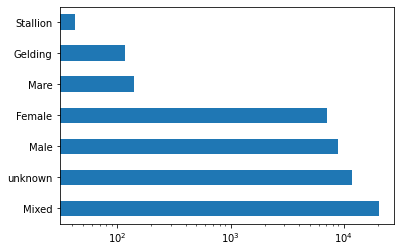

In [163]:
ax = df.gender.value_counts().plot(kind='barh')
ax.set_xscale('log')

In [164]:
df.nunique()

Title              37519
price                394
species              438
age                  101
gender                 7
description        44796
seller_name        20520
seller_location     1083
seller_type            5
listing_type           3
pet_type              11
dtype: int64

In [165]:
df['seller_type'].value_counts()

Individual          29107
Breeder             16573
Licensed Breeder     2388
Rescue/Charity        707
Company                 6
Name: seller_type, dtype: int64

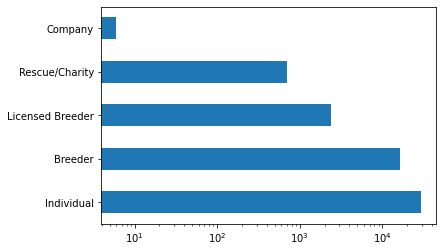

In [166]:
ax = df.seller_type.value_counts().plot(kind='barh')
ax.set_xscale('log')

In [167]:
df['seller_location'].value_counts().tail(100)

Appleby In Westmorland    1
Гул                       1
Солфорд                   1
St Austell                1
Busveal                   1
                         ..
Wylam                     1
Chester Le Street         1
Filey                     1
Ulceby                    1
Ilkley                    1
Name: seller_location, Length: 100, dtype: int64

Funny to have location data in foreign language. Probably should take a look at the posting.

In [168]:
df.loc[df['seller_location'] == 'Солфорд']

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type
41535,sold,900.0,Siamese,4 months,Mixed,We have available 1 Blue Point Siamese boy and...,Viktorija K.,Солфорд,Breeder,sale,cats


It looks fine, only location column is in foreign language. Caution have to be taken as we might have listing completely in foreign language.

In [169]:
df['age'].value_counts().tail(20)

2001              3
16 years          3
2000              3
Due in 6 weeks    3
2003 years        2
Due in 6 days     2
18 years          2
2004 years        2
20 years          2
2002 years        2
1998              1
2000 years        1
24 years          1
Due in 7 weeks    1
42 years          1
1999              1
66 years          1
2019 years        1
23 years          1
17 years          1
Name: age, dtype: int64

Some of these are very funny. probably it's the year of birth. Longer living animals tends to have their year of birth recorded as age, horses in particular

In [170]:
df.loc[df['pet_type'] == 'horses']

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type
287,tradition gypsy cob gelding,1200.0,Other Breed,2022,Gelding,shamus is 2 years old wormed passport microchi...,nicola r.,Truro,Breeder,sale,horses
288,Silversmith Burlesque Queen,2700.0,Miniature,2015,Mare,Silversmith Burlesque Queen This beautiful AMH...,Z A.,Redruth,Individual,sale,horses
549,Hart braking sale,3000.0,Welsh Section A,2006,Mare,Sadly I’ve come to the decision to let our gor...,Pugsforlove P.,Sturminster Newton,Individual,sale,horses
550,3 year old registered welsh section C Mare,2000.0,Welsh Section C,2019,Mare,Walena Lucky Charm Quality 3 year old regi...,Emily G.,Salisbury,Individual,sale,horses
551,"9 month old mixed breed colt, slightly spotted",650.0,Welsh Section A,2021,Stallion,"Ronnie is halter broken, will be groomed but n...",Tilly c.,Wincanton,Individual,sale,horses
...,...,...,...,...,...,...,...,...,...,...,...
44422,2 jenny donkeys very friendly,900.0,Other Breed,2010,Mare,"Age 12 years, always been together Both passpo...",Mark G.,Wrexham,Individual,sale,horses
44423,Super alrounder,0.0,Welsh Section D,2009,Mare,"13 year old, section D, 14.2hh M&M has a he...",Sharon P.,Holywell,Individual,sale,horses
46926,1 year old to make 15.2+,0.0,Welsh Section D,2021,Gelding,Not something I was planning on writing any ti...,Leah G.,Scunthorpe,Individual,sale,horses
46927,29” palomino 3 year old shetland colt,700.0,Shetland pony,2019,Stallion,For sale is Harry the 3 year old palomino col...,TJ V.,Doncaster,Individual,sale,horses


298 is just right the sum of mare, gelding and stallion. We can also see that horses have their year of birth listed as their age.

In [171]:
df['pet_type'].value_counts()

dogs             23151
cats             11489
rabbits           4400
rodents           2321
birds             2068
reptiles          1955
poultry           1528
fish              1031
invertebrates      366
horses             298
livestock          174
Name: pet_type, dtype: int64

In [172]:
df['price'].value_counts()

1000.0    2139
200.0     1955
500.0     1737
1500.0    1736
150.0     1722
          ... 
27.0         1
785.0        1
1245.0       1
2499.0       1
1880.0       1
Name: price, Length: 394, dtype: int64

In [173]:
df.sort_values(by=['price'], ascending=False).head(30)

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type
24577,For TEMPORARY Foster/Temporary Adoption,11111111.0,British Shorthair,3 years,Male,I'm looking for a loving TEMPORARY foster home...,Amy W.,Newark,Individual,adoption,cats
1530,Working Cocker spaniel dog pup,9999999.0,Cocker Spaniel,12 weeks,Male,One Liver Working cocker spaniel dog pup for s...,Joanne b.,Lymington,Licensed Breeder,sale,dogs
9625,2 male Chihuahua puppies for sale,9999999.0,Chihuahua,9 weeks,Male,Here we have two beautiful stunning chihuahua ...,Danielle E.,Kidderminster,Individual,sale,dogs
42999,OUTSTANDING 53 CHAMPS IN 5G BL,3333333.0,Cocker Spaniel,1 week,unknown,THE BEST IN BREED are here 🤗 SIRE is KC - slo...,Sarah sherman s.,Stoke-on-Trent,Individual,sale,dogs
28646,OUTSTANDING 53 CHAMPS IN 5G BL,3333333.0,Cocker Spaniel,1 week,unknown,THE BEST IN BREED are here 🤗 SIRE is KC - s...,Sarah sherman s.,Stoke-on-Trent,Individual,sale,dogs
200,Franco,1234567.0,Golden Retriever,3 years,unknown,Lovely natured golden retriever. Great with c...,Colin M.,Inverurie,Breeder,stud,dogs
1144,Top Basset for Stud,1111111.0,Basset Hound,1 year,unknown,Looking to stud out my big boy probably only ...,Darren P.,Romsey,Individual,stud,dogs
17105,❌••L4 FLUFFY CARRIERS••❌Coco girl❌,987654.0,French Bulldog,14 weeks,Mixed,❤️Beautiful pups from our blue girl❤️ Romeo ...,JACQUELINE I.,Hailsham,Individual,sale,dogs
2821,Stolen coco,888888.0,Bengal,2 years,unknown,Good morning we haven't seen coco since 15th F...,Nic I.,Stonehouse,Individual,sale,cats
23757,ragdoll cross,150350.0,Ragdoll,10 weeks,Mixed,"5 stunning ragdoll cross kittens, 3 girls 2 bo...",Layna L.,Runcorn,Breeder,sale,cats


some of the pricing makes no sense, owner probably want potential buyer to contact them. We should drop these. these outliers make price histogram unworkable. We may use boxplot to identify them.

In [174]:
df.loc[df['price'] == 0.0]

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type
32,African Cichlids bundle,0.0,Cichlids,1 year,unknown,"hi, I have got around 19 African cichlids look...",Margaret B,Peterculter,Breeder,sale,fish
33,Guppies for sale,0.0,Other/Mixed Breed,12 weeks,unknown,2 1/2 months old mixed guppies for sale: make...,Anil G.,Aberdeen,Individual,sale,fish
234,2 Beautiful Mini Lops,0.0,Mini Lop,1 year,Mixed,We are looking to rehome our 2 gorgeous bunnie...,Abigail W.,Helston,Individual,adoption,rabbits
296,HORSFIELD TORTOISES - 2 years old.,0.0,Tortoise,2 years,Female,Adoption only! Poppy & Penny are two beautifu...,Caley A.,Truro,Individual,adoption,reptiles
441,Full list baby ball python CB21,0.0,Python Snake,1 year,Mixed,"Passione breeder based in Southampton, here to...",Eden Garden Reptiles,Southampton,Breeder,sale,reptiles
...,...,...,...,...,...,...,...,...,...,...,...
46726,chocolate seal point female mini lop,0.0,Mini Lop,1 year,Female,daisy ❤️ chocolate seal point pure bred mini l...,Hip Hop B,Leeds,Breeder,sale,rabbits
46846,BABY BLUE HOLICER RABBITS,0.0,Mixed Breed,6 months,Male,Iv had to put these babies under mixed breed a...,Mini F Stud,Leeds,Breeder,sale,rabbits
46885,RARE BABY HOLICER BABIES - READ DESCRIPTION,0.0,Continental Giant,14 weeks,Mixed,- I have put them into the continental giant c...,Mini F Stud,Leeds,Breeder,sale,rabbits
46888,Rabbits for sale,0.0,English Lop,15 weeks,Mixed,"We have 5 beautiful rabbits for sale,they are ...",Kian R.,Wakefield,Individual,sale,rabbits


Make sense for adoption, questionable for sale. These are either misplaced listing or placeholder price.

In [175]:
def price_plot_hist (data, column):
    entries = data[column].unique()
    for entry in entries:
        plt.figure(figsize=(8,6))
        plt.xlabel(entry)
        plt.xticks(rotation=90)
        sns.distplot(x = data.loc[data[column] == entry].price)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


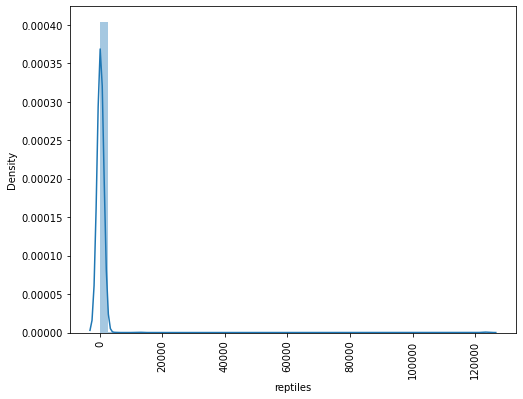

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


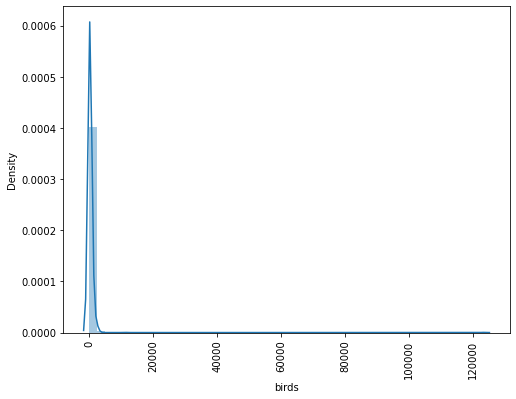

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


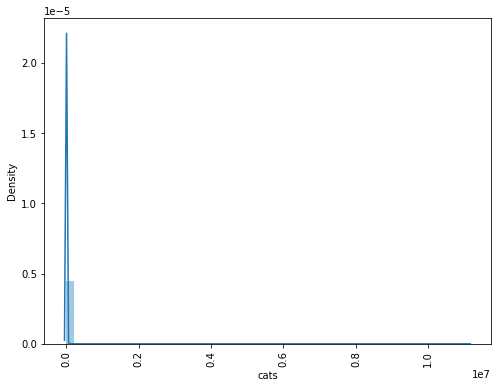

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


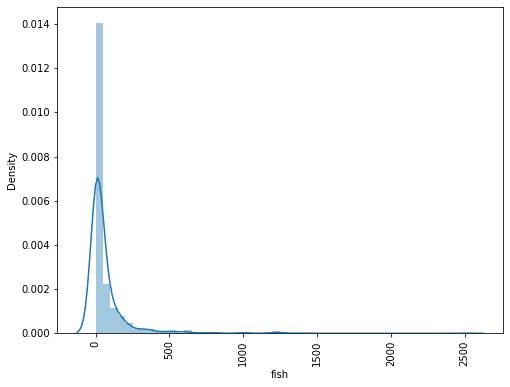

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


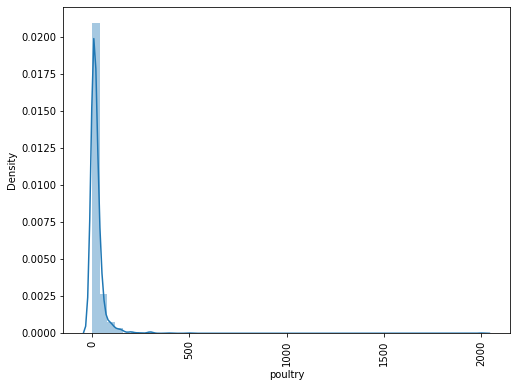

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


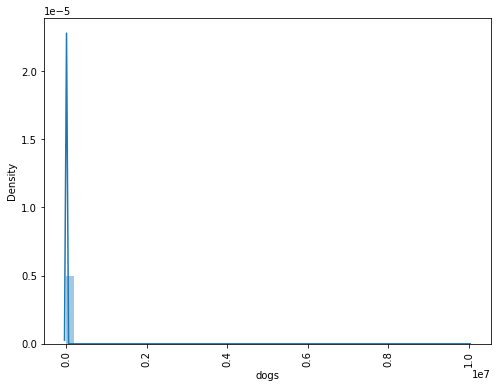

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


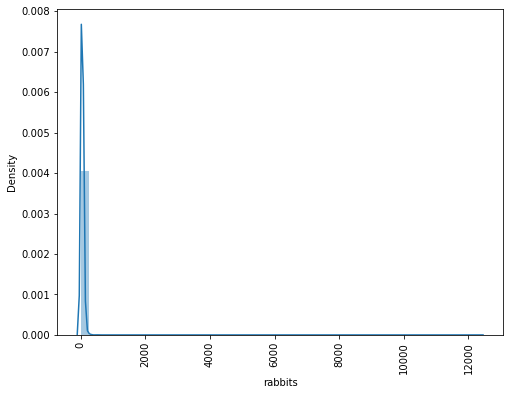

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


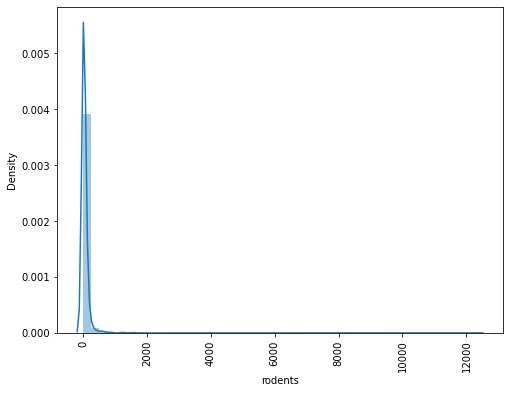

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


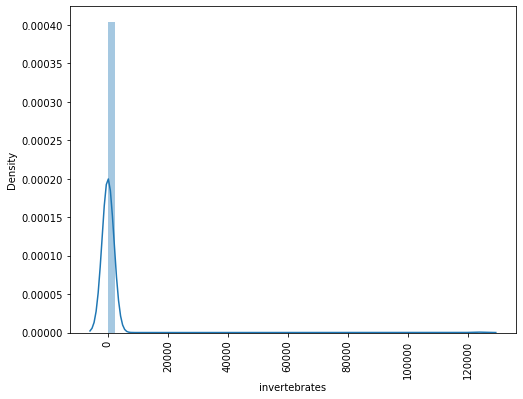

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


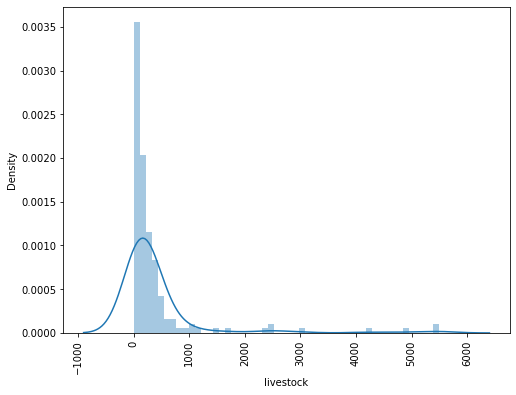

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


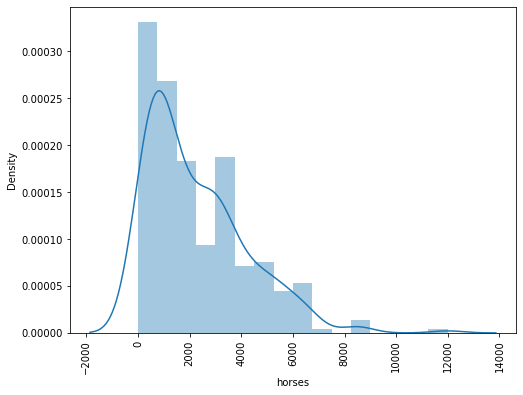

In [176]:
price_plot_hist (df,'pet_type')

Histogram don't look good because of extreme outliers. Horses and Lifestock look rather fine.

In [177]:
def price_plot_box (data, column):
    entries = data[column].unique()
    for entry in entries:
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=90)
        sns.boxplot(x = data.loc[data[column] == entry].price).set_title(entry)
        plt.show()

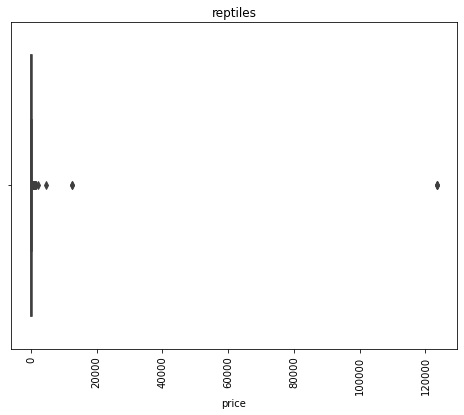

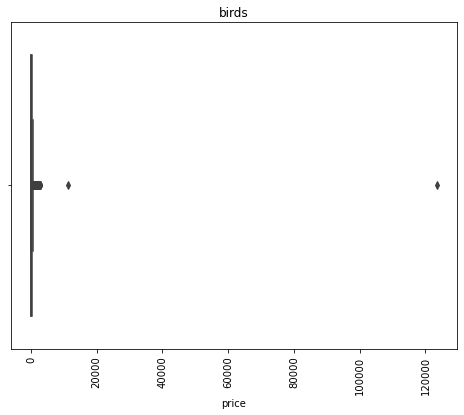

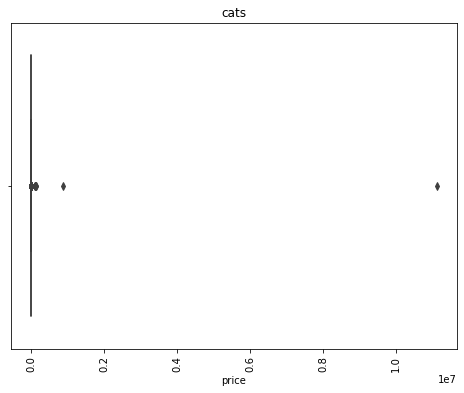

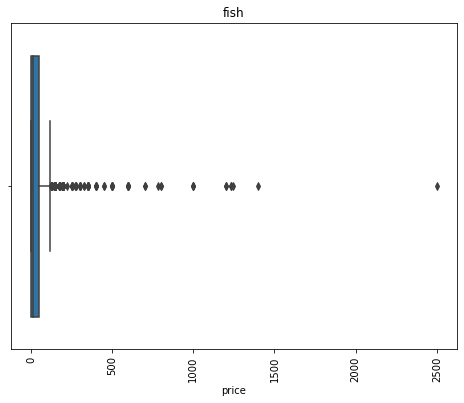

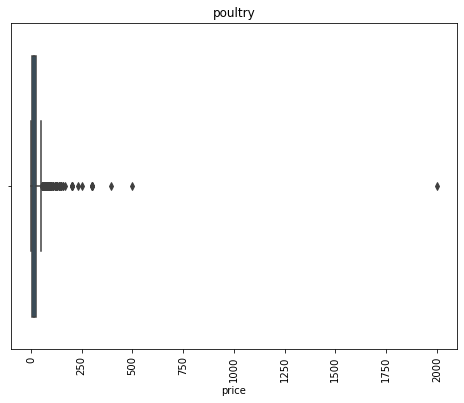

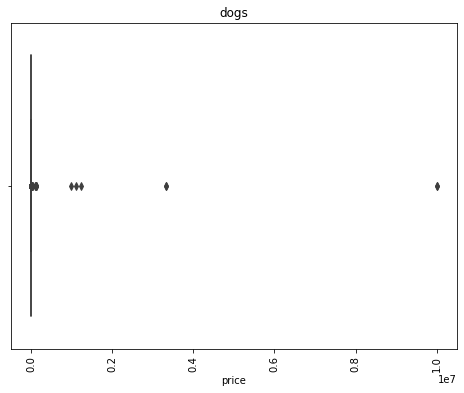

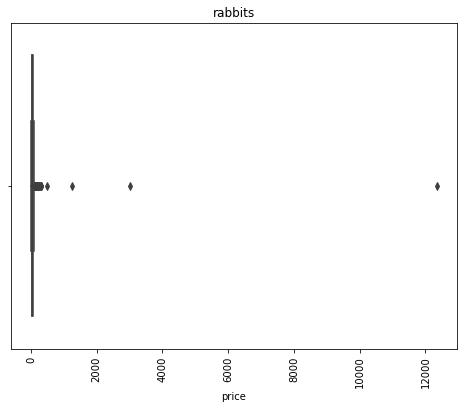

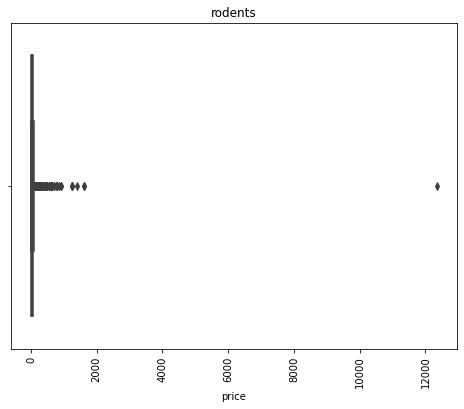

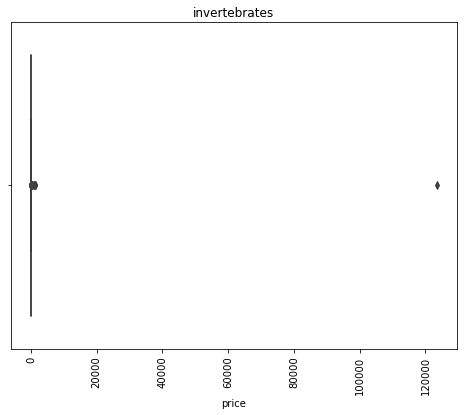

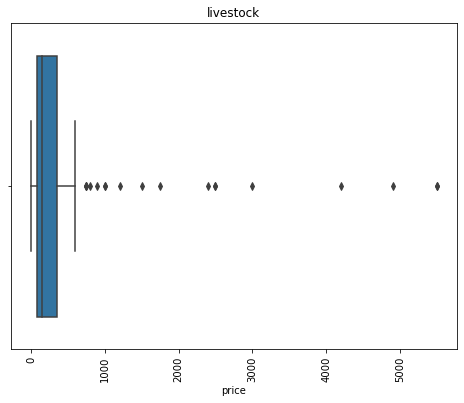

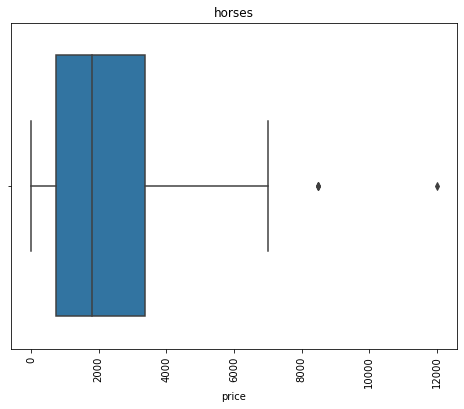

In [178]:
price_plot_box (df,'pet_type')

We could see that each pet types have their own outliers. 2000 doesn't look strange for dogs or cats but it's a sore thumb for poultry. This shows us that we should remove outliers by pet types.

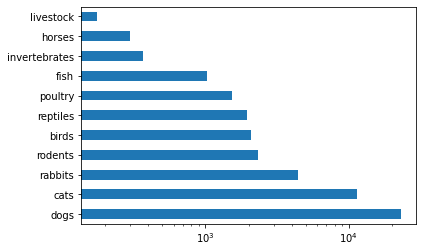

In [179]:
# plot value_counts of Series
ax = df.pet_type.value_counts().plot(kind='barh')
ax.set_xscale('log')

In [180]:
df['age'].str.startswith('Due').value_counts()

False    48636
True       145
Name: age, dtype: int64

135 of the listing aren't born yet. Let us convert age to workable numbers, it might provide some useful insight. We can convert those that aren't due yet or just born to zero while the rest are converted to number of years.

In [181]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [182]:
def process_age_to_year(age):
    age = str(age)
    value = np.mean([int(s) for s in age.split() if s.isdigit()])
    if "Due" in age:
        newage = 0
    elif "Just Born" in age:
        newage = 0
    elif "month" in age: 
        newage = value/12
    elif "week" in age: 
        newage = value/52
    elif "day" in age: 
        newage = value/365
    elif "year" in age: 
        if value > 100:
            newage = 2022 - value
        else:
            newage = value
    else:
        if age == 'unknown':
            newage = np.nan
        else:
            age = int(age)
            if age > 100:
                newage = 2022 - age
            else:
                newage = age
    return newage

In [183]:
df['year'] = df['age'].map(lambda x: process_age_to_year(x))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [184]:
df

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type,year
0,unsexed green tree python + 60cm vivtek,1000.0,Python Snake,3 years,Mixed,~3years old gtp biak x sorong Typical gtp a...,Patryk M.,Aberdeen,Individual,sale,reptiles,3.000000
1,Leopard gecko (f),80.0,Gecko,1 year,Female,Selling this leopard gecko I've had the joy of...,Dana I.,Aberdeen,Individual,sale,reptiles,1.000000
2,rexy,100.0,Iguana,4 years,Male,rexy needs a new home ASP sadly I don't not ...,Gillian W.,Aberdeen,Individual,sale,reptiles,4.000000
3,Panther Chameleon and full set up,550.0,Chameleon,9 months,Male,Blue is a 6 month old Nosey Mitsio chameleon. ...,Craig H.,Aberdeen,Individual,sale,reptiles,0.750000
4,Hand reared white Indian ringnecks,300.0,Parakeets,9 weeks,Mixed,I have 2 stunning white Indian ringnecks. 1 ma...,Dave T.,Aberdeen,Individual,sale,birds,0.173077
...,...,...,...,...,...,...,...,...,...,...,...,...
48776,canarys for sale all colour plus new colours,40.0,Canaries,7 weeks,Mixed,there are all mixed cocks and hens new volour ...,Robert n.,Knottingley,Breeder,sale,birds,0.134615
48777,TAME & TALKING HARNESS TRAINED BLUE & GOLD MACAW,2150.0,Macaws,4 years,Male,Rainbow is a beautiful example of a blue and g...,The Bradford Birdman,Bradford,Licensed Breeder,sale,birds,4.000000
48778,Hand reared indian ringnecks babys,350.0,Parrots,1 year,Male,Hand reared cuddly silly tame little babys for...,Waqar A.,Bradford,Breeder,sale,birds,1.000000
48779,One yellow one orange canary.,60.0,Canaries,2 years,Mixed,I’m reluctantly listing my canaries (peach and...,Amylia R.,Barnsley,Individual,sale,birds,2.000000


It looks good.

In [185]:
df.describe()

,price,year
count,4.878100e+04,48766.000000
mean,1.559520e+03,0.958430
std,8.475819e+04,1.727980
min,0.000000e+00,0.000000
25%,8.500000e+01,0.153846
50%,3.500000e+02,0.250000
75%,1.000000e+03,1.000000
max,1.111111e+07,66.000000


In [186]:
def year_plot_box (data, column):
    entries = data[column].unique()
    for entry in entries:
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=90)
        sns.boxplot(x = data.loc[data[column] == entry].year).set_title(entry)
        plt.show()

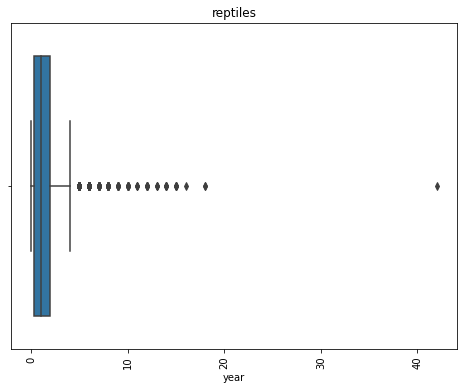

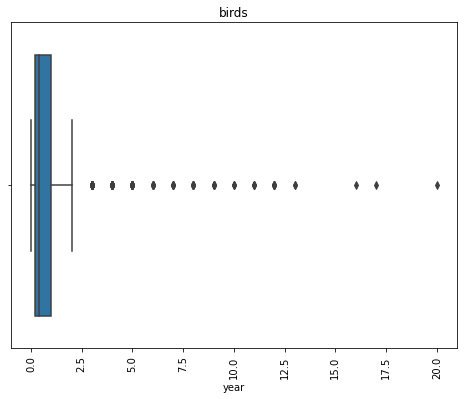

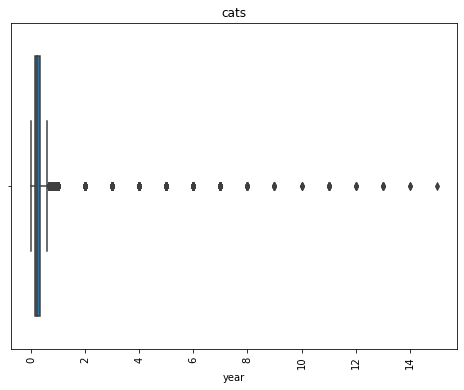

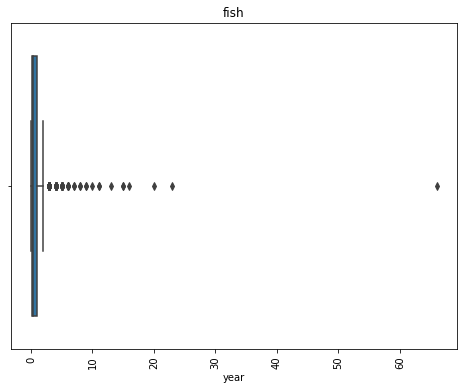

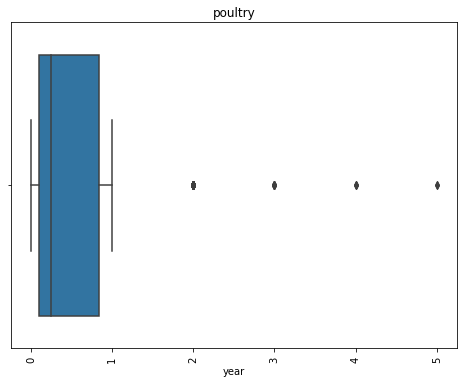

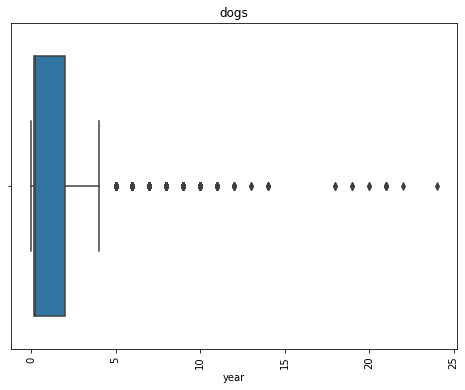

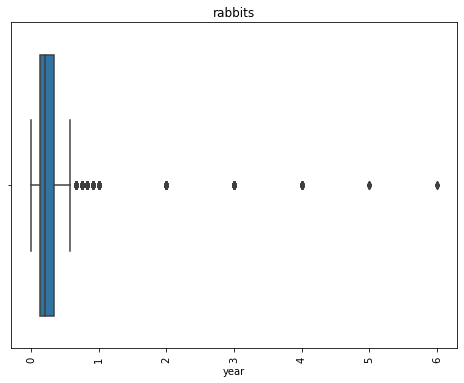

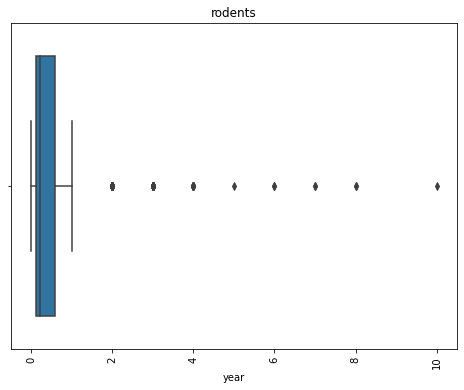

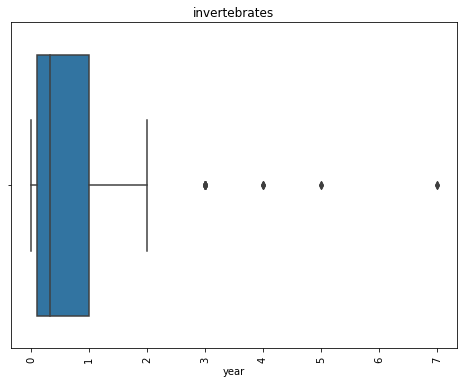

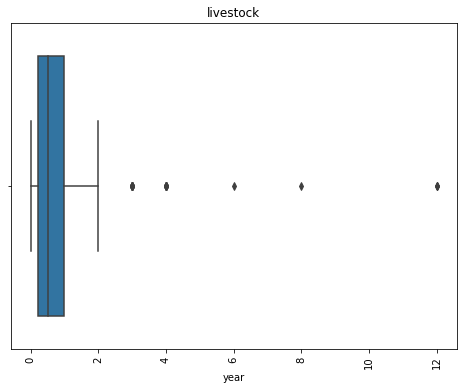

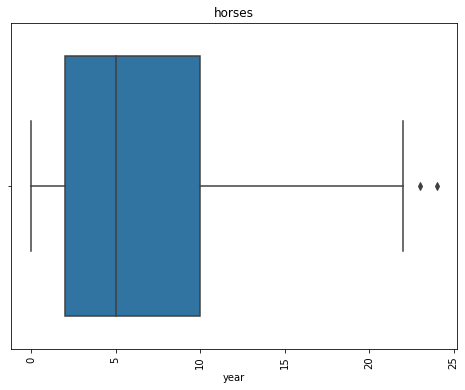

In [187]:
year_plot_box (df,'pet_type')

There are some strange values that look rather unrealistic.

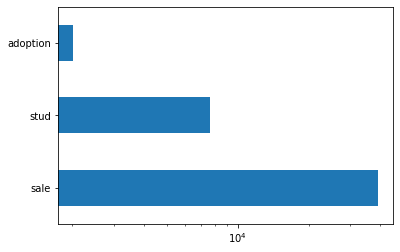

In [188]:
ax = df.listing_type.value_counts().plot(kind='barh')
ax.set_xscale('log')

In [189]:
df.corr()

,price,year
price,1.000000,0.000045
year,0.000045,1.000000


After looking more at the data, what I'm sure of:
- There are duplicates that scraper couldn't identify. This is likely because title and description changed during scraping.
- Some sellers put deposit as sale price, which explains why some listing looks extremely cheap
- Some cheap listing is because owner couldn't take care of the pet anymore and look for new family to take over
- Odd entries are because owner want to get in contact before deciding the sale
- Some listing are service offers which we are not interested in
- Correlation between price and age is weak

Data that we need to remove:
- Duplicates
- Those that aren't actual sale price. The hard part is identifiying them.
- Listing that are not in English. Those are likely to cause problems with NLP model.
- Those that service (microchipping, dog walking, etc)

To remove duplicates, we could ignore description and title column. The other columns are less likely to change after reposting.

Identify those listing not in english with langdetect.

### Dropping outliers for each pet type

In [198]:
df1=df
df1.dropna(inplace=True)
df1.drop(df1[(df1['price'] > 22000)].index, inplace=True) #those above 22000 are exceedingly exhorbitant
df1.drop(df1[(df1['price'] == 12345.0)].index, inplace=True) #the number look suspicious, checking the entry proved suspicion
df1.drop(df1[(df1['price'] == 1234.0)].index, inplace=True) #same as above
df1.drop(df1[(df1['pet_type'] == 'reptiles') & (df1['price'] > 1200)].index, inplace=True)
df1.drop(df1[(df1['pet_type'] == 'birds') & (df1['price'] > 10000)].index, inplace=True)
df1.drop(df1[(df1['pet_type'] == 'fish') & (df1['price'] > 2000)].index, inplace=True)
df1.drop(df1[(df1['pet_type'] == 'poultry') & (df1['price'] > 1000)].index, inplace=True)
df1.drop(df1[(df1['pet_type'] == 'rabbits') & (df1['price'] > 1000)].index, inplace=True)
df1.drop(df1[(df1['listing_type'] == 'sale') & (df1['Title'].str.contains('service'))].index, inplace=True)
df1.drop(df1[(df1['listing_type'] == 'sale') & (df1['Title'].str.contains('Services'))].index, inplace=True)
df1.drop(df1[(df1['listing_type'] == 'sale') & (df1['price'] == 0.0)].index, inplace=True) #sale couldn't be zero
#other listings don't look unusual enough to drop
#sometimes title and description changes during scraping and we need to remove those.
df1 = df1[~df1.duplicated(subset=['price', 'species', 'age', 'gender', 'seller_name', 'seller_location','seller_type',
                                  'listing_type','pet_type'])].reset_index(drop=True)

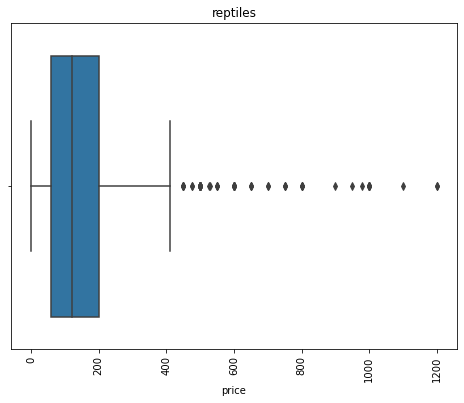

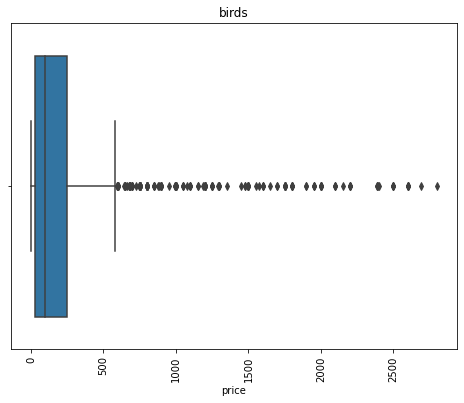

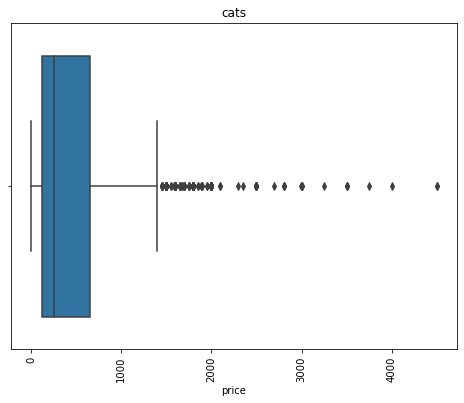

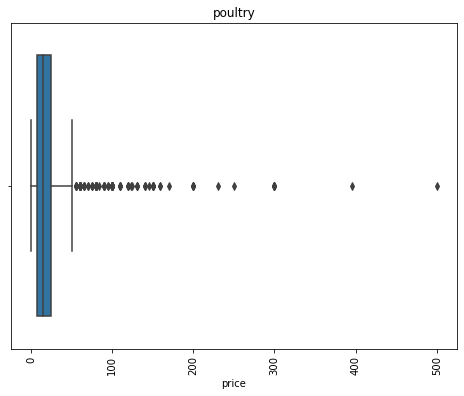

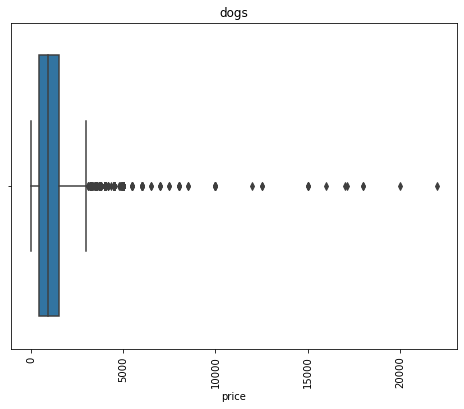

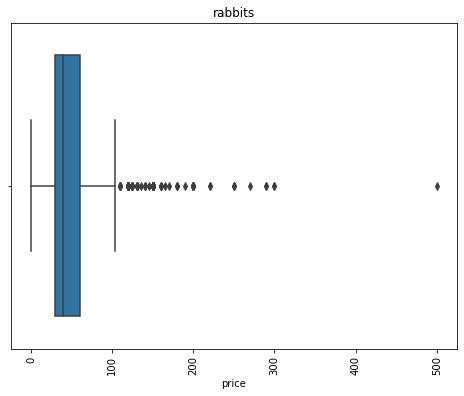

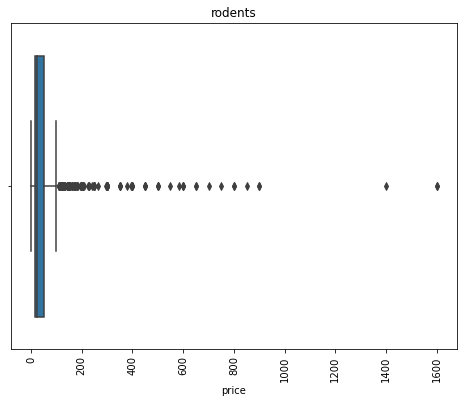

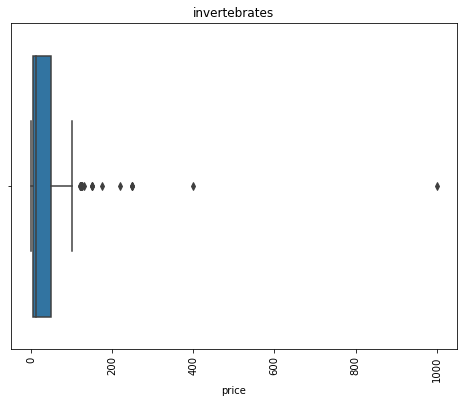

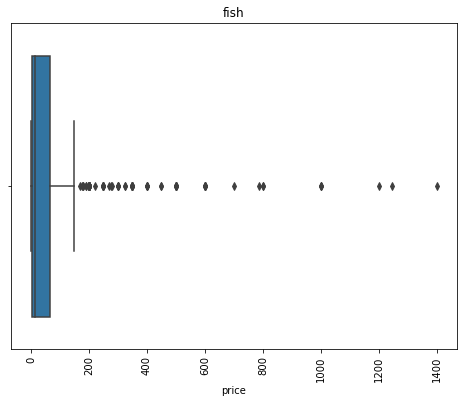

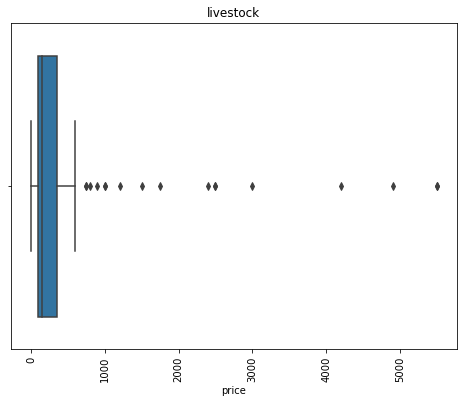

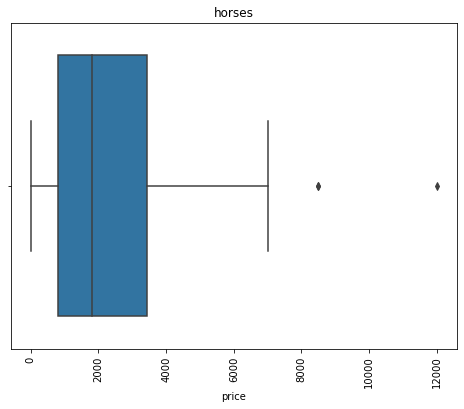

In [199]:
price_plot_box (df1,'pet_type')

In [211]:
df1.sort_values(by=['price'], ascending=False).head(30)

,Title,price,species,age,gender,description,seller_name,seller_location,seller_type,listing_type,pet_type,year
18089,kc reg red poodle puppies,22000.0,Poodle,8 weeks,Mixed,beautiful thick coats and very sociable happy ...,Norma bosley,Bridgend,Breeder,sale,dogs,0.153846
27907,Stunning Cream Boy Carrying PINK 💗 ❌Pied ❌Brindle,20000.0,French Bulldog,8 weeks,Male,I have one stunning quality boy available. No ...,Lottiebullz,Durham,Breeder,sale,dogs,0.153846
28247,Lilac & Tan Platinum Carrying Pink (caL),18000.0,French Bulldog,8 weeks,unknown,I have one stunning quality boy available. No ...,Lottiebullz,Durham,Breeder,sale,dogs,0.153846
8738,2 female fluffy frenchies,18000.0,French Bulldog,12 weeks,Female,1xfluffy carrier girl -blue and tan B/b E/e £6...,miranda w.,Alcester,Individual,sale,dogs,0.230769
38862,*STUNNING LITTER ALL FLUFF0Y L1 CARRIERS*,17148.0,French Bulldog,1 year,unknown,Our amazing Nala coat color DNA: ? AtAt/dd/c...,Daniel A.,Liverpool,Individual,sale,dogs,1.000000
21445,VISUAL FLUFFY LILAC FRENCHIES GIRL \BOYS,17000.0,French Bulldog,3 weeks,Mixed,Our lovely girl gave birth to 3 beautiful babi...,Beth E.,Rotherham,Breeder,adoption,dogs,0.057692
7388,Fluffy Frenchie and Fluffy Carrier,16000.0,French Bulldog,12 weeks,Female,We have 2 Sister for sale.The first is a full ...,Wesley s.,Alcester,Individual,sale,dogs,0.230769
36801,Merle Fluffy Carrier Female,15000.0,French Bulldog,1 year,Female,"Black merle carrying tan, coco, fluffy. Up to ...",Hilltop Bulldogs,Saint Helens,Licensed Breeder,sale,dogs,1.000000
28066,"Outstading Cream, Pink (caL) Carrier Boy",15000.0,French Bulldog,8 weeks,Male,I have one stunning quality boy available. No ...,Lottiebullz,Durham,Breeder,sale,dogs,0.153846
25097,French bulldogs for sale,15000.0,French Bulldog,10 weeks,Mixed,1 x female lilac and tan carrying testable cho...,Connor D.,Manchester,Breeder,sale,dogs,0.192308


In [209]:
df1.describe()

,price,year
count,41709.000000,41709.000000
mean,656.785922,0.946241
std,805.731562,1.722083
min,0.000000,0.000000
25%,100.000000,0.153846
50%,395.000000,0.250000
75%,1000.000000,1.000000
max,22000.000000,66.000000


### Saving the data so I don't have to rerun the code above again.

In [219]:
df1.to_csv('cleaned_data.csv', sep='\t', encoding='utf-8')

### Load in the the cleaned data

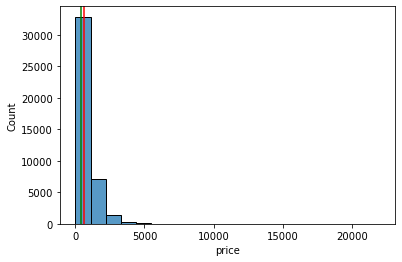

In [217]:
ax = sns.histplot(df1['price'], bins=20)
ax.axvline(df1['price'].mean(), c='r')
ax.axvline(df1['price'].median(), c='g')

Cleaned data looks rather satisfactory

From this alone, we can see that there's outliers need to be removed. But first, let us separate the listing by listing type.

In [ ]:
sale = df.loc[df['listing_type'] == 'sale']

In [ ]:
sale.describe()

Let us take a look at 0.0 sale price

In [ ]:
sale.loc[sale['price'] == 0 ]

It's less than 2% of our data, how about the outliers?

In [ ]:
sale.sort_values(by=['price'], ascending=False).head(30)

In [ ]:
sale['price'].value_counts()

In [ ]:
sale.loc[sale['pet_type'] == 'dogs' ].describe()

In [ ]:
sale.loc[sale['pet_type'] == 'dogs' ].sort_values(by=['price'], ascending=True).head(30)

In [ ]:
sale.loc[(sale['pet_type'] == 'dogs') & (sale['Title'].str.contains('deposit')) ].sort_values(by=['price'], ascending=True)

In [ ]:
df = df[~df.duplicated(subset=['price', 'species', 'age', 'gender', 'seller_name', 'seller_location','seller_type',
                               'listing_type','pet_type'])].reset_index(drop=True)
df

In [ ]:
df['language'] = df['description'].apply(detect)

In [ ]:
df

In [ ]:
#dropping values
sale.drop(sale[sale['price'] > 5000].index, inplace=True)
sale.drop(sale[sale['price'] == 0.0].index, inplace=True)

In [ ]:
sale.sort_values(by=['price'], ascending=False).head(30)

In [ ]:
sale.describe()

In [ ]:
histogram (sale,'pet_type')

In [ ]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [ ]:
def process_age_to_year(age):
    age = str(age)
    value = np.mean([float(s) for s in sal.split() if s.isdecimal() or isfloat(s)])
    if "year" in sal:
        newsal = value
    elif "month" in sal: 
        newsal = value*12
    elif "week" in sal: 
        newsal = value*50
    elif "day" in sal: 
        newsal = value*200
    elif "hour" in sal: 
        newsal = value*2000
    else:
        newsal = sal
    return newsal

In [ ]:
df['year'] = df['age']
df['year'] = df['year'].apply(lambda x: 0 if ('Due' in x) else x)
df['year'] = df['year'].apply(lambda x: float(str(x).replace(' weeks',''))/52 if ('weeks' in x) else x)
df['year'] = df['year'].apply(lambda x: float(x) if (float(x)>100) else float(x))